In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import silhouette_score
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r"C:\Users\mituc\Python\attack_classifier\data\df_attacks_enc.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,...,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,1,...,8,0.0,0.0,1.0,0.0,0.0,9,0.0,0.0,normal
1,0,1,0,239,486,0,0,0,0,1,...,8,0.0,0.0,1.0,0.0,0.0,19,0.0,0.0,normal
2,0,1,0,235,1337,0,0,0,0,1,...,8,0.0,0.0,1.0,0.0,0.0,29,0.0,0.0,normal
3,0,1,0,219,1337,0,0,0,0,1,...,6,0.0,0.0,1.0,0.0,0.0,39,0.0,0.0,normal
4,0,1,0,217,2032,0,0,0,0,1,...,6,0.0,0.0,1.0,0.0,0.0,49,0.0,0.0,normal


In [90]:
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 28) (163027, 28)
(330994, 1) (163027, 1)


KMEANS

In [10]:
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')
# visualizer.fit(X)  
# visualizer.show();

In [11]:
kmeans = KMeans(n_clusters=5)
km_fit = kmeans.fit(X)

In [12]:
labels = km_fit.labels_
labels

array([4, 4, 4, ..., 4, 4, 4])

In [13]:
centroids = km_fit.cluster_centers_
centroids

array([[-3.19948061e-16,  9.05941988e-14,  2.66384137e-14,
         1.34958324e-06,  1.98680048e-17,  1.73201297e-17,
         1.97238059e-15, -2.88584125e-18,  1.56294519e-17,
         1.10994547e-13, -2.65121312e-18,  7.23704950e-17,
         2.44623115e-18,  6.91178885e-19, -4.99410626e-18,
         1.22514845e-17,  0.00000000e+00,  0.00000000e+00,
        -1.03194363e-15,  9.92320240e-01,  4.07729406e-14,
        -1.21916366e-14,  1.00000000e+00,  1.28855260e-14,
         5.35335665e-15,  9.99928417e-01,  3.31947843e-05,
        -3.16673771e-15],
       [ 2.06679229e-07,  5.00143653e-01,  1.00491869e-01,
         1.14927987e-05,  1.46418755e-06,  2.18353158e-04,
         6.70382501e-04, -1.30019557e-18,  1.14922714e-05,
         8.04459002e-05,  1.17002764e-07,  1.89193279e-17,
        -6.16639986e-18,  8.20876532e-07, -4.72305571e-18,
         1.17364885e-17,  0.00000000e+00,  0.00000000e+00,
         1.39428399e-16,  2.17289841e-02,  9.99174050e-01,
         9.53858530e-05,  7.22

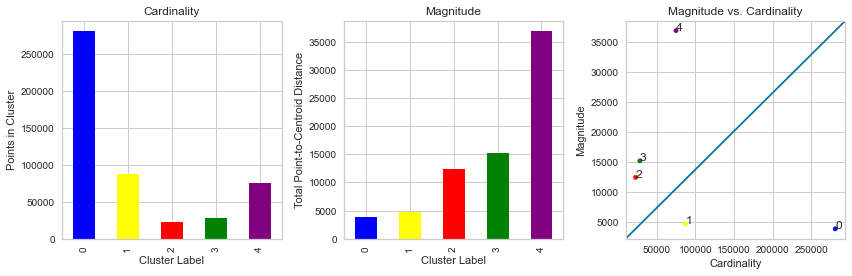

In [14]:
cluster_colors = ['blue', 'yellow', 'red', 'green', "purple"]

# iniciamos los subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

# ploteamos la CARDINALIDAD
plot_cluster_cardinality(labels, # las labels que predijo nuestro modelo
                         ax=ax1, # sobre que eje lo queremos hacer
                         title="Cardinality", # título de la gráfica
                         color=cluster_colors # colores que vamos a querer usar
                        )


# ploteamos la MAGNITUD
plot_cluster_magnitude(X, # el dataframe del que sacaremos los datos
                       labels, # las labels que predijo nuestro modelo
                       centroids, # los centroides de nuestros clusters
                       euclidean, # la distancia que quiero usar para medir
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )

# ploteamos la RELACIÓN ENTRE CARDINALIDAD Y MAGNITUD
plot_magnitude_vs_cardinality(X,# el dataframe del que sacaremos los datos
                              labels, # las labels que predijo nuestro modelo
                              centroids, # los centroides de nuestros clusters
                              euclidean,# la distancia
                              color=cluster_colors,
                              ax=ax3,
                              title="Magnitude vs. Cardinality")
plt.tight_layout()
plt.show()

GAUSSIAN NAIVE BAYES

In [15]:
model1 = GaussianNB()

In [16]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [17]:
gaussian_train_time = end_time - start_time
print("Gaussian Naive Bayes train time: ", gaussian_train_time)

Gaussian Naive Bayes train time:  0.43008923530578613


In [18]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [19]:
gaussian_test_time = end_time - start_time
print("Gaussian Naive Bayes test time: ", gaussian_test_time)

Gaussian Naive Bayes test time:  0.23118352890014648


In [20]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8465047704792232
Test score is: 0.8462524612487502


DECISION TREE CLASSIFIER

In [21]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [22]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [23]:
decision_train_time = end_time - start_time
print("Decision Tree train time: ", decision_train_time)

Decision Tree train time:  0.7071378231048584


In [24]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [25]:
decision_test_time = end_time - start_time
print("Decision Tree test time: ", decision_test_time)

Decision Tree test time:  0.021012067794799805


In [26]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9921720635419373
Test score is: 0.9917743686628595


RANDOM FOREST CLASSIFIER

In [27]:
model3 = RandomForestClassifier(n_estimators=30)

In [28]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [29]:
random_forest_train_time = end_time - start_time
print("Random Forest train time: ", random_forest_train_time)

Random Forest train time:  5.2392802238464355


In [30]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [31]:
random_forest_test_time = end_time - start_time
print("Random Forest test time: ", random_forest_test_time)

Random Forest test time:  0.37461161613464355


In [32]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999456183495773
Test score is: 0.9996319628037074


SUPPORT VECTOR MACHINE CLASSIFIER

In [33]:
model4 = SVC(gamma = 'scale')

In [34]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [35]:
vm_train_time = end_time - start_time
print("Support Vector Machine train time: ", vm_train_time)

Support Vector Machine train time:  110.46265864372253


In [36]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [37]:
vm_test_time = end_time - start_time
print("Support Vector Machine test time: ", vm_test_time)

Support Vector Machine test time:  69.31428909301758


In [38]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.993229484522378
Test score is: 0.9932526514013016


LOGISTIC REGRESSION

In [39]:
model5 = LogisticRegression(max_iter=1200000)

In [40]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [41]:
logistic_train_time = end_time - start_time
print('Logistic Regression train time: ', logistic_train_time)

Logistic Regression train time:  15.534477949142456


In [42]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [43]:
logistic_test_time = end_time - start_time
print('Logistic Regression test time: ', logistic_test_time)

Logistic Regression test time:  0.026911497116088867


In [44]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9913049783379759
Test score is: 0.9913449919338514


GRADIENT BOOSTING CLASSIFIER

In [45]:
model6 = GradientBoostingClassifier(random_state=0)

In [46]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [47]:
gradient_train_time = end_time - start_time
print('Gradient Boosting train time: ', gradient_train_time)

Gradient Boosting train time:  459.151593208313


In [48]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [49]:
gradient_test_time = end_time - start_time
print('Gradient Boosting test time: ', gradient_test_time)

Gradient Boosting test time:  1.0803427696228027


In [50]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9989093457887455
Test score is: 0.9987302716727904


ARTIFICIAL NEURAL NETWORK

In [51]:
def fun():
    model = Sequential()
    
    #here 28 is input dimension
    model.add(Dense(28, input_dim =28, activation = 'relu', kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5, activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [52]:
model7 = KerasClassifier(build_fn=fun, epochs=100, batch_size=64)

In [53]:
start = time.time()
model7.fit(X_train, Y_train.values.ravel())
end = time.time()

Epoch 1/100
5172/5172 [==============================] - 4s 785us/step - loss: 0.2900 - accuracy: 0.9324
Epoch 2/100
5172/5172 [==============================] - 4s 796us/step - loss: 0.0817 - accuracy: 0.9842
Epoch 3/100
5172/5172 [==============================] - 4s 772us/step - loss: 0.0719 - accuracy: 0.9845
Epoch 4/100
5172/5172 [==============================] - 4s 755us/step - loss: 0.0679 - accuracy: 0.9846
Epoch 5/100
5172/5172 [==============================] - 4s 750us/step - loss: 0.0628 - accuracy: 0.9846
Epoch 6/100
5172/5172 [==============================] - 4s 754us/step - loss: 0.0606 - accuracy: 0.9846
Epoch 7/100
5172/5172 [==============================] - 4s 764us/step - loss: 0.0588 - accuracy: 0.9846
Epoch 8/100
5172/5172 [==============================] - 4s 753us/step - loss: 0.0576 - accuracy: 0.9846
Epoch 9/100
5172/5172 [==============================] - 4s 748us/step - loss: 0.0567 - accuracy: 0.9846
Epoch 10/100
5172/5172 [==============================]

In [54]:
nn_train_time = end - start
print('Neural Network train time: ', nn_train_time)

Neural Network train time:  432.69571471214294


In [55]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()

5095/5095 [==============================] - 3s 562us/step


In [56]:
nn_test_time = end_time - start_time
print('Neural Network test time: ', nn_test_time)

Neural Network test time:  3.596223831176758


In [57]:
accuracy_score(Y_train, Y_train.values.ravel())

1.0

In [58]:
accuracy_score(Y_test,Y_test_pred7)

0.9980678047194637

Training accuracy

<BarContainer object of 7 artists>

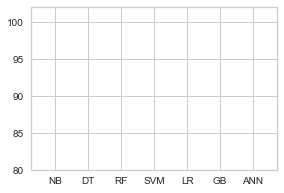

In [59]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [model1.score(X_train, Y_train), model2.score(X_train, Y_train), model3.score(X_train, Y_train),
          model4.score(X_train, Y_train), model5.score(X_train, Y_train), model6.score(X_train, Y_train),
          accuracy_score(Y_train, Y_train.values.ravel())]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [67]:
def save_scaler(amount, filename = "scaler.pkl"): 
    with open(filename, "wb") as f:
        pickle.dump(amount, f)

save_scaler(model6, filename="models/6_gb.pkl")

In [70]:
model_json = model7.model.to_json()

In [79]:
# serialize model to JSON
model_json = model7.model.to_json()
with open("models/model7.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model7.model.save_weights("models/model7.h5")
print("Saved model to disk")

Saved model to disk


In [77]:
from keras.models import model_from_json

In [83]:
from keras.models import load_model

In [ ]:
# later...

# load json and create model
json_file = open('models/model7.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("models/model7.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [82]:
model7.model.save("model7.h5")
print("Saved model to disk")

Saved model to disk


In [91]:
# load model
model = load_model('model7.h5')
# summarize model.
model.summary()
# load dataset
dataset = df
# split into input (X) and output (Y) variables
#X = dataset[:0:8]
#Y = dataset[:8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                812       
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
 dense_2 (Dense)             (None, 5)                 10        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


ValueError: in user code:

    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\engine\training.py", line 1501, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\mituc\anaconda3\envs\py39\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible
